In [19]:
from capstone.portfolio_model import mean_variance_portfolio
from capstone.util import load_dataset
import pandas as pd

In [20]:
pickle_path = './pickle'
kospi_pickle_path = pickle_path + '/kospi_data.pickle'

In [21]:
interest_rate_increase_path = pickle_path + '/interest_rate_increase.pickle'
yield_curve_inversion_path = pickle_path + '/yield_curve_inversion.pickle'

In [22]:
df_interest = pd.read_pickle(interest_rate_increase_path)

In [23]:
df_interest_dropna = df_interest.dropna(axis=1)

In [24]:
df_interest_dropna_return = df_interest_dropna.pct_change().dropna()

/var/folders/ws/lngrb3y14bx9ckr9196sk6qm0000gn/T/ipykernel_65992/374649962.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_interest_dropna_return = df_interest_dropna.pct_change().dropna()


In [25]:
df_interest_dropna_return

Code,A005930,A000660,A207940,A005380,A068270,A000270,A105560,A005490,A055550,A035420,...,A114090,A005250,A093370,A003030,A001680,A016380,A000670,A105630,A178920,A008730
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.010753,0.006376,-0.010392,-0.020747,-0.005528,-0.040632,-0.023085,-0.002114,-0.017301,-0.021448,...,0.000000,-0.020225,-0.004888,-0.002110,-0.012931,-0.008974,0.001550,0.002890,-0.005714,0.003571
2020-01-03,0.005435,-0.002112,-0.015169,-0.016949,-0.013888,-0.011765,0.012889,0.004237,0.003521,-0.005479,...,0.007712,-0.013761,0.009824,-0.003171,-0.002183,-0.003881,0.018576,-0.005764,0.011494,0.021352
2020-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-06,0.000000,-0.002116,-0.023697,0.000000,-0.025353,-0.002381,-0.011665,-0.025316,-0.015205,-0.005510,...,-0.028061,-0.018605,-0.029184,-0.001060,-0.032823,0.000000,-0.009119,-0.017391,-0.034091,-0.017422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-25,0.005594,0.004082,0.011843,0.005780,0.029803,0.005450,-0.034426,-0.008993,-0.021357,0.039669,...,0.020906,0.015284,0.075909,0.165138,-0.015453,0.019802,-0.012121,0.004608,0.029940,-0.022727
2022-02-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
test_df = df_interest_dropna_return[:'2021-01-01']
validation_df = df_interest_dropna_return['2021-01-02':]

In [27]:
mean_returns = test_df.mean()
cov_matrix = test_df.cov()

In [28]:
mean_returns

Code
A005930    0.001167
A000660    0.000856
A207940    0.002059
A005380    0.001592
A068270    0.002330
             ...   
A016380    0.001969
A000670   -0.000315
A105630    0.000575
A178920    0.000546
A008730    0.001302
Length: 182, dtype: float64

In [29]:
weight = mean_variance_portfolio(mean_returns, cov_matrix)

In [30]:
weight

array([2.80816169e-13, 0.00000000e+00, 4.22084243e-14, 4.43204501e-14,
       1.81055691e-13, 7.45055059e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.93298372e-14, 6.48968726e-14, 9.86433157e-14,
       0.00000000e+00, 2.68040798e-14, 0.00000000e+00, 0.00000000e+00,
       2.67671302e-13, 0.00000000e+00, 7.04341099e-14, 3.71378275e-14,
       7.50762300e-14, 0.00000000e+00, 0.00000000e+00, 4.40012610e-15,
       2.17575090e-13, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.30147629e-13, 0.00000000e+00, 1.07743675e-14, 0.00000000e+00,
       0.00000000e+00, 3.76151367e-13, 1.21140077e-13, 0.00000000e+00,
       0.00000000e+00, 6.41587478e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.55822749e-14, 1.84375085e-14,
       1.11148937e-13, 0.00000000e+00, 1.64231476e-13, 1.31466019e-13,
       7.36320727e-14, 0.00000000e+00, 0.00000000e+00, 1.15567278e-14,
       2.79064966e-14, 1.70609187e-13, 1.53639254e-13, 0.00000000e+00,
      

In [31]:
result = validation_df @ weight

In [32]:
result

Date
2021-01-02    0.000000
2021-01-03    0.000000
2021-01-04    0.052336
2021-01-05    0.012433
2021-01-06   -0.043860
                ...   
2022-02-25    0.039886
2022-02-26    0.000000
2022-02-27    0.000000
2022-02-28    0.063014
2022-03-01    0.000000
Length: 424, dtype: float64

In [33]:
df_profit_accumulate = (1+result).cumprod() - 1
df_profit_accumulate

Date
2021-01-02    0.000000
2021-01-03    0.000000
2021-01-04    0.052336
2021-01-05    0.065421
2021-01-06    0.018692
                ...   
2022-02-25   -0.317757
2022-02-26   -0.317757
2022-02-27   -0.317757
2022-02-28   -0.274766
2022-03-01   -0.274766
Length: 424, dtype: float64

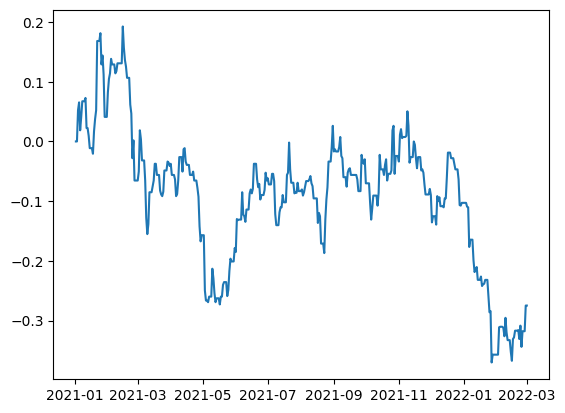

In [34]:
import matplotlib.pyplot as plt
plt.plot(df_profit_accumulate)

In [35]:
df_profit_accumulate

Date
2021-01-02    0.000000
2021-01-03    0.000000
2021-01-04    0.052336
2021-01-05    0.065421
2021-01-06    0.018692
                ...   
2022-02-25   -0.317757
2022-02-26   -0.317757
2022-02-27   -0.317757
2022-02-28   -0.274766
2022-03-01   -0.274766
Length: 424, dtype: float64